# Módulo 5 Actividad 6

## Intención del aprendizaje esperado:

6. Elaborar un modelo predictivo aplicando el algoritmo Random Forest para resolver un problema de clasificación utilizando lenguaje Python.

## Ejercicios Planteados


El problema que abordaremos es predecir la temperatura máxima para mañana en una determinada ciudad usando un año de datos meteorológicos anteriores. Usted usará Seattle, WA, pero también puede buscar datos para otra ciudad usando la herramienta de datos climáticos en línea de la NOAA. 
Tenemos acceso a un año de temperaturas máximas históricas, las temperaturas de los dos días anteriores y una estimación de un amigo que siempre afirma saberlo todo sobre el clima. Este es un problema de aprendizaje automático de regresión supervisado. Durante el entrenamiento, para usar random forest debemos darle tanto las características como los objetivos, y debe aprender a asignar los datos a una predicción. Para esto usará los datos meteorológicos para Seattle, WA de 2016 utilizando la herramienta de datos climáticos en línea de la NOAA. En general, alrededor del 80 % del tiempo dedicado al análisis de datos se dedica a la limpieza y recuperación de datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad. La herramienta NOAA es sorprendentemente fácil de usar y los datos de temperatura se pueden descargar como archivos csv limpios que se pueden analizar. El archivo de trabajo se llama temps.csv que encontrará cargado en la plataforma.

## Usted posee las siguientes variables para trabajar:

- year: 2016 para todos los puntos de datos
- month: número del mes del año
- day: número para el día del año
- week: día de la semana como cadena de caracteres
- temp_2: temperatura máxima 2 días antes
- temp_1: temperatura máxima 1 día antes
- average: temperatura máxima promedio histórica
- actual: medición de temperatura máxima
- friend: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio



## Realice lo siguiente:

***1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de otro modo, realice un análisis descriptivo de sus datos, comente.***


In [49]:
import pandas as pd

temps = pd.read_csv('temps.csv')

temps.head()


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [50]:
temps.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [51]:
print(temps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB
None


### Análisis descriptivo del dataset.

En principio usamos el metodo .head() para visualizar las primeras 5 filas de registro con la intención de tener una generalidad del dataset.  Podemos observar que son 12 columnas de las cuales existe una que toma valores categóricos (week) indicando el nombre de los días de la semana y todas las demás representan valores numéricos, sin embargo no podemos evidenciar mayores conclusiones con la información.

En segunda instancia usamos el método .describe() de pandas que nos entrega mayores antecedentes estadísticos como el conteo general de registro en cada columna, el promedio y desviación estándar como también los valores máximos y minimos e incluye también los valores para los cuartiles (q1, q2, q3).  Esta información resulta más útil ya que vemos, por ejemplo, que no se consideran todas las temperaturas del año bisiesto 2016 que correspondería a 366 días y solo tenemos 348 registros. También podemos observar que el valor máximo registrado para las temp_2 y temp_1 parece tener un error de registro ya que indica 117º, lo que no se observa en la columna 'actual'.  Respecto a las predicciones de 'friend' podemos generalizar que en promedio no se aleja tanto del promedio real pero si existe una diferencia ostensible en cuanto a la desviación estándar lo que se refleja en los valores mínimos y máximos y los valores distribuidos en cuartiles.  Por último podemos observar también que las temperaturas del año 2016 resultan más extremas que las temperaturas promedios históricas lo que implica que existe una variación climática para dicho año, y que en promedio la temperatura ha aumentado un par de grados erspecto a los registros históricos.

Por último, utilizamos el método .info() para obtener información sobre el detalle de cada columna, de tal manera de buscar si existen registros faltantes, y podemos visualizar que todas ninguna columna cuenta con valores nulos.

***2. Realice un análisis gráfico de las temperaturas máximas históricas, las temperaturas de los dos días anteriores y la estimación del amigo, con respecto a la fecha. Comente si hay anomalías.***

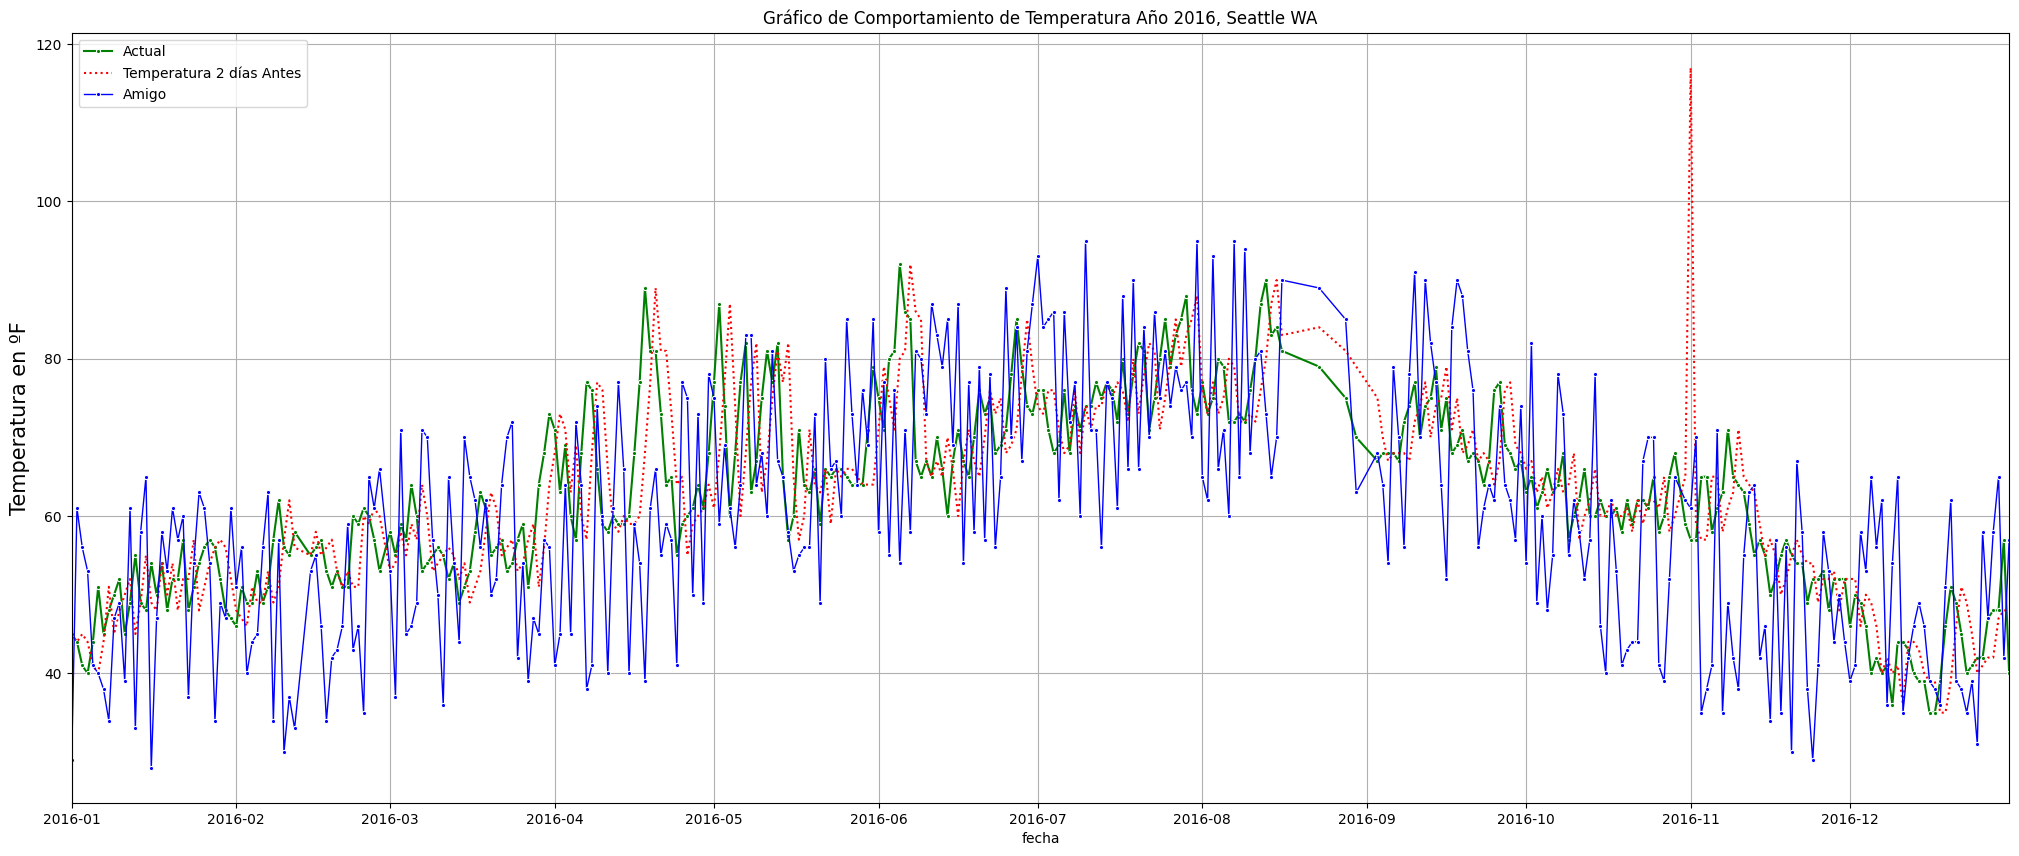

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

temps['fecha'] = pd.to_datetime(temps[['year', 'month', 'day']])

figure = plt.figure(figsize=(25, 10))
sns.lineplot(data=temps, x='fecha', y='actual', color='green', marker='.', label=f'Actual')
sns.lineplot(data=temps, x='fecha', y='temp_2', color='red', linestyle=':', label=f'Temperatura 2 días Antes')
sns.lineplot(data=temps, x='fecha', y='friend', color='blue', marker='.', label=f'Amigo', linewidth=1)

plt.title('Gráfico de Comportamiento de Temperatura Año 2016, Seattle WA')
plt.xlim(-2, 350)
plt.xlim(temps['fecha'].min(), temps['fecha'].max())
plt.ylabel('Temperatura en ºF', fontsize=15)

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

temps = temps.drop('fecha', axis=1)



In [53]:
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


El gráfico nos revela mayor información respecto al comportamiento de las temperaturas máximas.  En primera instancia podemos observar un claro error en el registro de la temp_2 puesto que la línea que lo representa debiese ser la misma forma que el gráfico actual corrido un poco hacia la derecha, que es lo que se aprecia en todo el gráfico excepto en el punto que habíamos observado anteriormente (117ºF), en adición, aseguramos que es un error ya que se escapa completamente de la tendencia y resulta ser el único registro que llega a esos valores, lo que se puede apreciar ya que no existe otro registro que supere los 100ºF.

En segundo lugar, las predicciones de 'friend' resultan ser muy erróneas ya que la linea que lo representa, además de ser muy oscilante, no coincide con la línea verde que es la línea que representa los valores reales de la temperatura, lo que implica que su fiabilidad en la predicción es errática y nada precisa.

### Preparación de la data:


***3. Recodifique los días de la semana, creando siete variables 1-0 asociados a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas***


<img src='get_dummies.jpg'>

In [54]:
df_temps = pd.DataFrame(temps)
df_temps = df_temps.drop(columns=['forecast_noaa', 'forecast_acc', 'forecast_under'], axis=1)

df_temps = pd.get_dummies(df_temps, columns=['week']).astype(int)
df_temps



,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46,44,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45,48,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45,48,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45,57,42,1,0,0,0,0,0,0


***4. Ahora, separe los datos en predictores y variable respuesta. Su variable Y es la temperatura máxima real y los predictores son todas las columnas que usa el modelo para hacer una predicción. Asegúrese de transformar en una matriz Numpy porque esa es la forma en que funciona el algoritmo.***

In [55]:
import numpy as np

X = df_temps.drop('actual', axis=1)
X = X.values

y = df_temps['actual']
y = y.values



***5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla (random_state = 42) para obtener los mismos valores.***

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


***6. Cree una línea de base, es decir, el error que obtendremos si simplemente predijéramos la temperatura máxima promedio para todos los días.***

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

temperatura_maxima_promedio_train = np.mean(y_train)
linea_base_prediccion = np.full((len(y_test),), temperatura_maxima_promedio_train)


mse_linea_base_prediccion = mean_squared_error(y_test, linea_base_prediccion)
mae_linea_base_prediccion = mean_absolute_error(y_test, linea_base_prediccion)

print(f'MSE de la línea base: {mse_linea_base_prediccion:.4f}')
print(f'MAE de la línea base: {mae_linea_base_prediccion:.4f}')



MSE de la línea base: 139.4589
MAE de la línea base: 9.5818


## Ajuste del modelo:


***7. Ajuste un modelo de regresión de bosque aleatorio con los datos de entrenamiento. Implemente 1000 árboles y use la misma semilla declarada en el punto 5.***

In [58]:
from sklearn.ensemble import RandomForestRegressor

modelo_regresion_random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)
modelo_regresion_random_forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

***8. Obtenga la predicción. Coméntalo.***

***9. Obtenga las métricas de precisión***

Predicciones:
[68.843 60.357 51.516 61.416 65.726 70.774 80.426 78.704 62.51  72.849]

Valores reales:
[66 61 52 66 70 82 85 84 65 92]

==================== MÉTRICAS DE ERROR DEL MODELO=====================

El error medio absoluto (MAE) del modelo es.................... 3.9092
El error medio cuadrado (MSE) del modelo es....................26.2689
La raíz de error medio cuadrado (RMSE) del modelo es........... 5.1253
El R2_Score (R^2) del modelo es................................ 0.8111




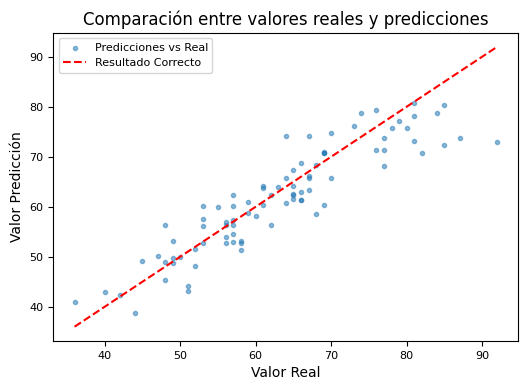

In [59]:
from sklearn.metrics import r2_score

y_pred = modelo_regresion_random_forest.predict(X_test)


print("Predicciones:")
print(y_pred[:10])

print("\nValores reales:")
print(y_test[:10])  

mae_modelo_regresion_random_forest = mean_absolute_error(y_test, y_pred)
mse_modelo_regresion_random_forest = mean_squared_error(y_test, y_pred)
rmse_modelo_regresion_random_forest = np.sqrt(mse_modelo_regresion_random_forest)
r2_modelo_regresion_random_forest = r2_score(y_test, y_pred)

print()
print(' MÉTRICAS DE ERROR DEL MODELO'.center(70, '='))
print()
print(f'El error medio absoluto (MAE) del modelo es'.ljust(63, '.') +  f'{mae_modelo_regresion_random_forest:.4f}'.rjust(7))
print(f'El error medio cuadrado (MSE) del modelo es'.ljust(63, '.') +  f'{mse_modelo_regresion_random_forest:.4f}'.rjust(7))
print(f'La raíz de error medio cuadrado (RMSE) del modelo es'.ljust(63, '.') +  f'{rmse_modelo_regresion_random_forest:.4f}'.rjust(7))
print(f'El R2_Score (R^2) del modelo es'.ljust(63, '.') +  f'{r2_modelo_regresion_random_forest:.4f}'.rjust(7))
print()
print('=' * 70)
print()

plt.figure(figsize=(6, 4))

plt.scatter(y_test, y_pred, marker='.', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel('Valor Real')
plt.ylabel('Valor Predicción')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Comparación entre valores reales y predicciones')
plt.legend(['Predicciones vs Real', 'Resultado Correcto'], fontsize=8)
plt.show()

Se imprime en primera instancia los valores de 10 predicciones y el valor real notando que para algunos casos no hay mucha diferencia en consideración que son ºF, no obstante se puede apreciar que en otros casos si hay una diferencia considerable.  Se incluyen métricas de error para el modelo, las cuales arrojan valores aceptables pues más allá de que este sea un modelo de predicción con bases estadísticas, existen otros factores que no se consideran en el modelo que influyen directamente en el tiempo atmosférico, como por ejemplo la influencia del calentamiento global u otros factores que pueden alterar los patrones climáticos, aún así la capacidad de predicción es bastante cercana a los valores reales.  Podemos ver también que el modelo mejora de manera ostencible los valores de los errores calculados en el punto 6 y con esto demuestra que es un método confiable.

Como hemos aprendido en el bootcamp, también incluí un gráfico de dispersión que nos permite apreciar que tan alejado de la realidad se encuentran las predicciones y si bien, a temperaturas más altas hay mayor dispersión, desde mi punto de vista no son tan dramáticas pues también los resultados se muestran en un rango aceptable.


***10. ¿Considera que el modelo es adecuado?***

Según lo aprendido en clases, los modelos *Random Forest* son mayormente utilizados para problemas de clasificación pero no de manera excluyente, lo que significa que también pueden ser utilizados para resolver problemas de regresión.  De todas maneras, de acuerdo a los resultados obtenidos y en tomando en cuenta que la meteorología es un tema complejo con múltiples variables y factores que influyen en el tiempo, yo apruebo en este caso su uso pero me parece que existen otras soluciones que podrían responder de mejor manera a la problemática planteada.